# Tokenization & Tokenizer
### Tokenization : text를 word 또는 sub-word로 분리하는 것
- rule-based tokenization (공백 또는 구둣점으로 분리)
    - 문제점 : very big vocabulary 생성 (ex. Transformer XL : 267,735) --> large embedding matrix 생성 --> memory, time complexity 증가
- sub-word tokenization
    - 원칙 : *빈번히 사용되는 단어*는 더 작은 sub-word로 나뉘어 지면 안된다.
    - *가끔 사용되는 단어*는 의미있는 sub-word로 나뉘어 져야 한다.
    - --> 교착어 (한국어, 터키어, 일본어 등)의 token화에 유용. BERT 104개국어 버전은 110,000 vocabulary size
### Tokenizer : 사전 방식 - KoNLPy --> 언어지식 필요
- sub word방식 - BPE, WordPiece, SentencePiece --> 언어지식 불필요, 다수의 언어에 공통으로 적용 가능

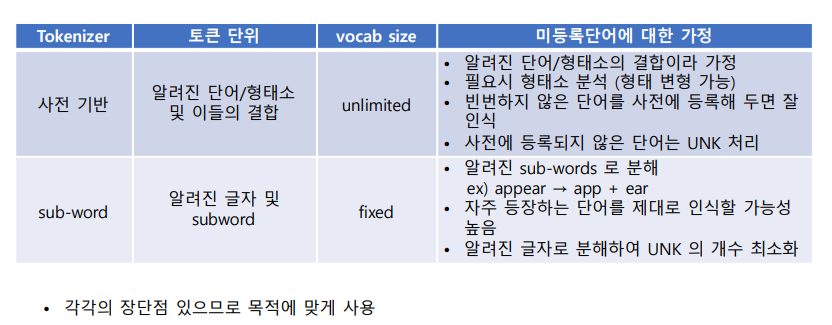

### WPM(Word Piece Model) 개요
- 하나의 단어를 내부단어(sub-word)로 통계에 기반하여 띄어쓰기로 분리
- 2015년 처음 제안되어 구글 번역기에서 사용
- 하나의 단어는 의미있는 여러 단어들의 조합으로 구성된 경우가 많기 때문에, 단어를 여러 단어로 분리하여 보겠다는 전처리 작업
- 입력 문장에서 띄어쓰기는 언더바(_)로 치환 --> 차후 다시 문장 복원을 위한 장치
<br><br>
- WPM은 BPE(Byte Pair Encoding) 알고리즘 사용
    - 1994년에 제안된 데이터 압축 알고리즘
    - 훈련 데이터에 있는 단어들을 모든 글자 (characters) 또는 유니코드 (unicode) 단위로 단어 집합(vocabulary)를 만들고, 가장 많이 등장하는 유니그램을 하나의 유니그램으로 통합
    - [aa]abd[aa]abax --> Z[ab]dZ[ab]ac --> [ZY]d[ZY]ac --> XdXac : 필요한 사전의 크기는 늘었지만 데이터의 길이는 줄어든다. 
### Google SentencePiece
- 사전 토큰화 작업 없이 단어 분리 토큰화를 수행하므로 *언어에 종속되지 않음*
- 영어권 언어나 한국어는 단어 분리를 시도했을때 어느정도 의미있는 단위로 나누는 것이 가능
- open source로 개방하여 실무에 사용 가능
- SentecePiece는 Unigram 알고리즘 사용

***

## Tokenizer train

In [1]:
! pip install -q KoNLPy
! pip install -U -q sentencepiece

In [2]:
sentences_E = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'I was born in Korea and graduated University in USA'
]

sentences_K = [
    "코로나가 심하다",
    "코비드-19가 심하다",
    '아버지가방에들어가신다',
    '아버지가 방에 들어가신다',
    '너무너무너무는 나카무라세이코가 불러 크게 히트한 노래입니다'
]

### 1. keras 기본 Tokenizer - rule-based
- 공백 또는 구둣점으로 분리
- 영어 단어별로 띄어쓰기가 철저히 지켜지는 언어

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>') # 빈도 상위 100개로 구성
tokenizer.fit_on_texts(sentences_E)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'i': 2, 'love': 3, 'my': 4, 'dog': 5, 'in': 6, 'cat': 7, 'you': 8, 'was': 9, 'born': 10, 'korea': 11, 'and': 12, 'graduated': 13, 'university': 14, 'usa': 15}


keras의 rule-based tokenizer 로 한글을 tokenize

In [13]:
tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>')
tokenizer.fit_on_texts(sentences_K)
vocabulary_keras_korean = tokenizer.word_index
print(vocabulary_keras_korean)

{'<OOV>': 1, '심하다': 2, '코로나가': 3, '코비드': 4, '19가': 5, '아버지가방에들어가신다': 6, '아버지가': 7, '방에': 8, '들어가신다': 9, '너무너무너무는': 10, '나카무라세이코가': 11, '불러': 12, '크게': 13, '히트한': 14, '노래입니다': 15}


### 2. 단어 사전 기반 한국어 tokenizer 사용

In [5]:
from konlpy.tag import Okt
okt = Okt()

temp_K = []
for sent in sentences_K:
    temp_K.append(okt.morphs(sent)) # morphs 형태소 분석
    print(okt.morphs(sent))

# Java error. got output below from Colab    
# ['코로나', '가', '심하다']
# ['코', '비드', '-', '19', '가', '심하다']
# ['아버지', '가방', '에', '들어가신다']
# ['아버지', '가', '방', '에', '들어가신다']
# ['너무', '너무', '너', '무', '는', '나카무라', '세이', '코', '가', '불러', '크게', '히트', '한', '노래', '입니다']

OSError: [WinError 126] JVM DLL not found: C:\Program Files\Java\jdk1.8.0_201\jre\bin\server\jvm.dll


In [6]:
temp_K = [['코로나', '가', '심하다'],
['코', '비드', '-', '19', '가', '심하다'],
['아버지', '가방', '에', '들어가신다'],
['아버지', '가', '방', '에', '들어가신다'],
['너무', '너무', '너', '무', '는', '나카무라', '세이', '코', '가', '불러', '크게', '히트', '한', '노래', '입니다']]

사전 기반 tokenize 후 Keras tokenizer로 vocabulary 생성

In [10]:
tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>') # 빈도 상위 100개
tokenizer.fit_on_texts(temp_K)
vocabulary_okt_keras = tokenizer.word_index
print(vocabulary_okt_keras)

{'<OOV>': 1, '가': 2, '심하다': 3, '코': 4, '아버지': 5, '에': 6, '들어가신다': 7, '너무': 8, '코로나': 9, '비드': 10, '-': 11, '19': 12, '가방': 13, '방': 14, '너': 15, '무': 16, '는': 17, '나카무라': 18, '세이': 19, '불러': 20, '크게': 21, '히트': 22, '한': 23, '노래': 24, '입니다': 25}


두 vocabulary이 차이 비교

In [11]:
print(vocabulary_keras_korean)
print('--------------------------------------------------')
print(vocabulary_okt_keras)

{'<OOV>': 1, '심하다': 2, '코로나가': 3, '코비드': 4, '19가': 5, '아버지가방에들어가신다': 6, '아버지가': 7, '방에': 8, '들어가신다': 9, '너무너무너무는': 10, '나카무라세이코가': 11, '불러': 12, '크게': 13, '히트한': 14, '노래입니다': 15}
--------------------------------------------------
{'<OOV>': 1, '가': 2, '심하다': 3, '코': 4, '아버지': 5, '에': 6, '들어가신다': 7, '너무': 8, '코로나': 9, '비드': 10, '-': 11, '19': 12, '가방': 13, '방': 14, '너': 15, '무': 16, '는': 17, '나카무라': 18, '세이': 19, '불러': 20, '크게': 21, '히트': 22, '한': 23, '노래': 24, '입니다': 25}


##### 단, Okt 사전에 미등록된 단어의 경우 정확한 tokenizing이 안된다.
* 사전에 단어를 추가해야 정확하게 분석한다 (이름, 고유명사 등)

In [ ]:
okt.pos('너무너무너무는 나카무라세이코가 불러 크게 히트한 노래입니다.')
# [('너무', 'Adverb'),
#  ('너무', 'Adverb'),
#  ('너', 'Modifier'),
#  ('무', 'Noun'),
#  ('는', 'Josa'),
#  ('나카무라', 'Noun'),
#  ('세이', 'Noun'),
#  ('코', 'Noun'),
#  ('가', 'Josa'),
#  ('불러', 'Verb'),
#  ('크게', 'Noun'),
#  ('히트', 'Noun'),
#  ('한', 'Josa'),
#  ('노래', 'Noun'),
#  ('입니다', 'Adjective'),
#  ('.', 'Punctuation')]

### 3. Google SentencePiece Tokenizer
* naver movie rating data를 이용한 sentencepiece tokenizer training

In [15]:
import tensorflow as tf
import pandas as pd
import sentencepiece as spm
DATA_TRAIN_PATH = '../../data/naver_movie/ratings_train.txt'

* pandas.read_csv에서 quoting = 3으로 설정해주면 인용구(따옴표)를 무시

In [17]:
train_data = pd.read_csv(DATA_TRAIN_PATH, sep = '\t', quoting = 3)
print(train_data.shape)
train_data.head()

(150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [18]:
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [19]:
train_data.dropna(inplace = True)
train_data.shape

(149995, 3)

#### 학습을 위해 text를 따로 저장

In [20]:
with open('../../data/naver_movie/nsmc.txt', 'w', encoding = 'utf-8') as f:
    for line in train_data.document.values:
        try:
            f.write(line + '\n')
        except:
            print('write error ---->', line)

In [21]:
# write가 잘 되었는지 확인
with open('../../data/naver_movie/nsmc.txt', 'r', encoding = 'utf-8') as f:
    nsmc_txt = f.read().split('\n')
print(len(nsmc_txt))
print(nsmc_txt[0])

149996
아 더빙.. 진짜 짜증나네요 목소리


In [23]:
# 텍스트 저장시 line + \n에서 마지막 \n때문에 len이 149995-->149996으로 늘었다.
nsmc_txt[149995]

''

In [56]:
import os
input_file = '../../data/naver_movie/nsmc.txt'
vocab_size = 30000
prefix = 'nsmc'

output_dir = os.path.dirname(os.path.abspath(input_file))  # Get the directory of the input file
model_path = os.path.join(output_dir, prefix)
#vocab_path = os.path.join(output_dir, f'{prefix}.vocab')

templates = '--input={} --model_prefix={} --vocab_size={}'
cmd = templates.format(input_file, model_path, vocab_size)
cmd

'--input=../../data/naver_movie/nsmc.txt --model_prefix=c:\\Users\\Playdata\\Documents\\GitHub\\Deep-Learning\\data\\naver_movie\\nsmc --vocab_size=30000'

##### Sentencepiece tokenizer training

In [57]:
# vocabulary 사전을 만들고 있음
spm.SentencePieceTrainer.Train(cmd)
# nsmc.model, nsmc.vocab 생성됨

In [59]:
sp = spm.SentencePieceProcessor()
sp.Load('{}.model'.format(model_path))

True

In [60]:
for t in train_data.document.values[:3]:
    print(t)
    print(sp.encode_as_pieces(t)) # 띄어쓰기 부분_로
    print(sp.encode_as_ids(t), '\n')

아 더빙.. 진짜 짜증나네요 목소리
['▁아', '▁더빙', '..', '▁진짜', '▁짜증나네요', '▁목소리']
[53, 751, 5, 25, 15853, 1405] 

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
['▁흠', '...', '포스터보고', '▁초딩영화', '줄', '....', '오버', '연기', '조차', '▁가볍지', '▁않', '구나']
[1239, 6, 12536, 18315, 396, 47, 17886, 395, 1134, 6404, 1063, 423] 

너무재밓었다그래서보는것을추천한다
['▁너무', '재', '밓', '었다', '그래서', '보는것', '을', '추천', '한다']
[18, 611, 21195, 640, 2752, 11171, 14, 2315, 298] 



***

### NER (Named Entity Recognition) : 개체명 인식
- 이름을 가진 *개체* (named entity)를 *인식* 하는 것
    - 즉, 어떤 이름을 의미하는 단어를 보고는 그 단어가 어떤 유형(사람, 장소, 조직 등)을 의미하는 단어인지를 인식하는 것
-개체명 인식은 챗봇 등에서 필요로 하는 주요 전처리 작업
    - 질문 문장의 어절을 일반화시키는 과정에서 개체명(Named Entity) 인식 사전을 활용
- 도메인 또는 목적에 특화되도록 개체명 인식을 정확하게 하는 방법 증 하나는 기존에 공개된 개체명 인식기를 사용하는 것이 아니라, 직접 목적에 맞는 데이터를 준비하고 기계를 훈련시켜 모델을 만드는 방법
##### NER system 적용 분야
- Search Engine 호율화 : 검색 키워드 추출
- Recommendation engine : 유사한 NER history의 사용자끼리 grouping
- Customer Service : Customer와 service agent간 matching
- Automatic Trading : CEO, 회사명 등 NER 이용하여 뉴스 검색 후 sentiment analysis가 긍정이면 매수
##### RNN을 이용한 NER

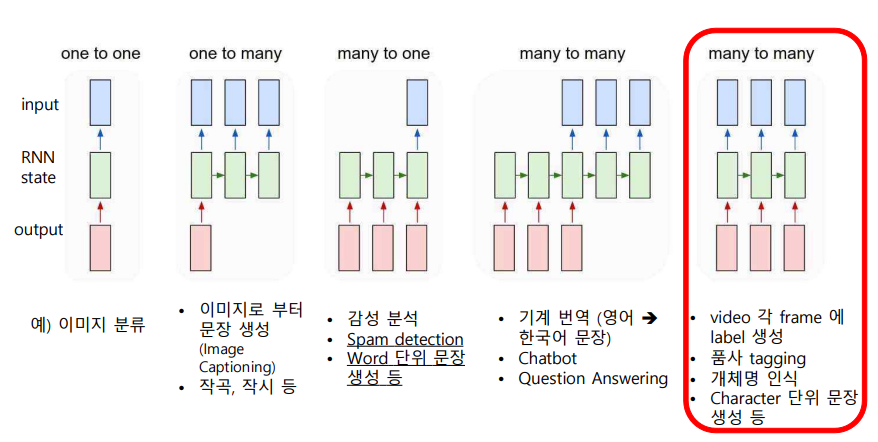
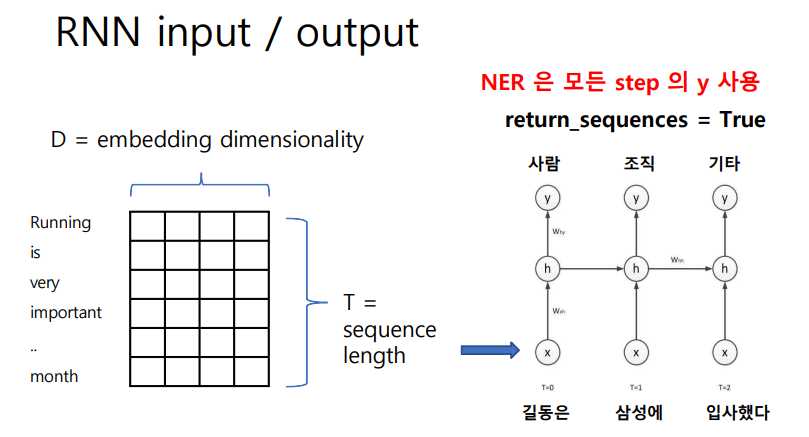
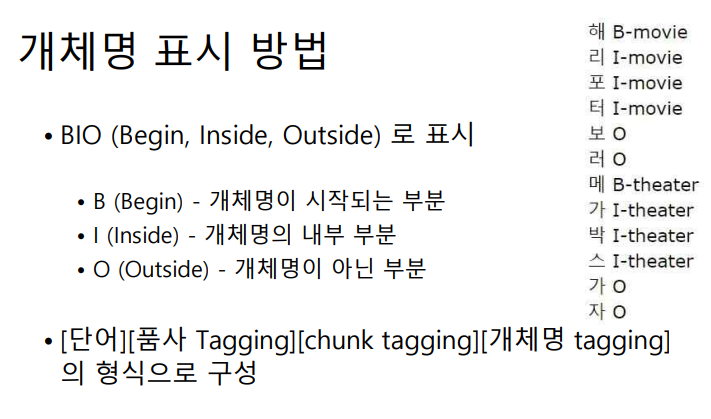
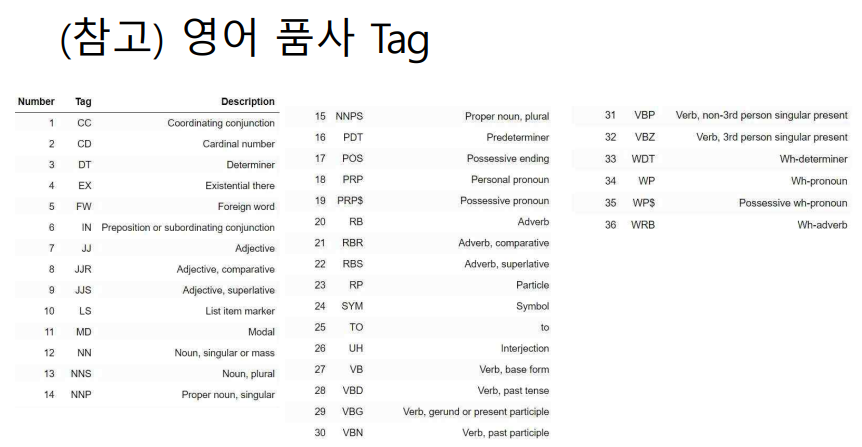
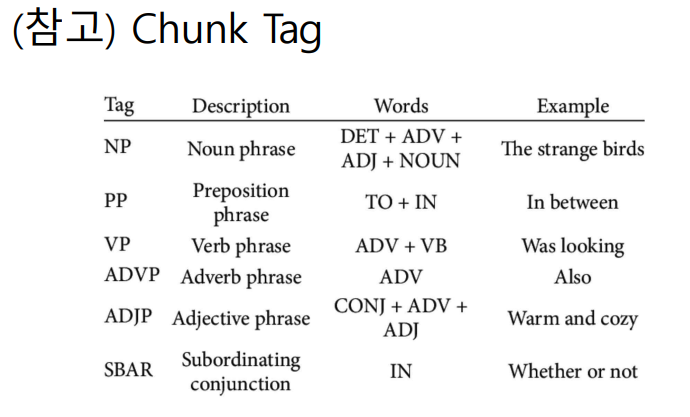

## Bidirectional LSTM NER model
- Named Entity Recognition using Bi-LSTM

### CoNLL2003 dataset 이용

- CoNLL -  the Conference on Natural Language Learning  


- https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt  에서 download  



- `[word][pos Tagging][chunk tagging][named entity tagging]` 의 4 column 형식으로 구성   


- NE(Named Entity) tagging :   
    LOC - location,   
    ORG - organization,  
    PER - person,   
    MISC - miscellaneous,   
    B - phrase 시작,   
    I - inside phrase,   
    O - phrase 의 일부가 아님
```
The DT B-NP O                             # 개체명 아님               
European NNP I-NP B-ORG            # ORG type phrase 시작 
Commission NNP I-NP I-ORG         # phrase 에 속함 - ORG
said VBD B-VP O                           # 개체명 아님
on IN B-PP O
Thursday NNP B-NP O
it PRP B-NP O
disagreed VBD B-VP O
with IN B-PP O
German JJ B-NP B-MISC                # MISC type phrase 시작
advice NN I-NP O
to TO B-PP O
consumers NNS B-NP O
to TO B-VP O
shun VB I-VP O
```

#### Dataset download 및 전처리

In [61]:
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [62]:
# 데이터 불러오기
file_path = tf.keras.utils.get_file("train.txt", 
    "https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt")

3283420/3283420 [==============================] - 48s 15us/step


In [63]:
file_path

'C:\\Users\\Playdata\\.keras\\datasets\\train.txt'

In [64]:
# 데이터 확인
for line in open(file_path, 'r').readlines()[:20]:
    print(repr(line))

'-DOCSTART- -X- -X- O\n'
'\n'
'EU NNP B-NP B-ORG\n'
'rejects VBZ B-VP O\n'
'German JJ B-NP B-MISC\n'
'call NN I-NP O\n'
'to TO B-VP O\n'
'boycott VB I-VP O\n'
'British JJ B-NP B-MISC\n'
'lamb NN I-NP O\n'
'. . O O\n'
'\n'
'Peter NNP B-NP B-PER\n'
'Blackburn NNP I-NP I-PER\n'
'\n'
'BRUSSELS NNP B-NP B-LOC\n'
'1996-08-22 CD I-NP O\n'
'\n'
'The DT B-NP O\n'
'European NNP I-NP B-ORG\n'


- `-DOCSTART- -X- -X- O` 로 file 시작
-  문장 사이는 empty line 으로 구분 

In [65]:
tagged_sentences = []
sentence = []

for line in open(file_path, 'r'):
    if len(line) == 0 or line.startswith('-DOCSTART') or line[0] == "\n": # 필요 없는 부분 버리기
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
        
    word, pos_tag, chunk_tag, ner = line.split(' ')   # 공백을 기준으로 속성을 구분 
    ner = re.sub('\n', '', ner)         # ['German', 'JJ', 'B-NP', 'B-MISC\n'] 에서 줄바꿈 제거
    word = word.lower()                         # 단어들은 소문자로 바꿔서 저장
    sentence.append((word, ner))                # 단어와 개체명 태깅만 사용

In [66]:
print("전체 샘플 개수: ", len(tagged_sentences)) # 전체 샘플의 개수 출력
tagged_sentences[:3]

전체 샘플 개수:  14041


[[('eu', 'B-ORG'),
  ('rejects', 'O'),
  ('german', 'B-MISC'),
  ('call', 'O'),
  ('to', 'O'),
  ('boycott', 'O'),
  ('british', 'B-MISC'),
  ('lamb', 'O'),
  ('.', 'O')],
 [('peter', 'B-PER'), ('blackburn', 'I-PER')],
 [('brussels', 'B-LOC'), ('1996-08-22', 'O')]]

### N to N model

#### input, label data 작성을 위해 단어와 tag 를 분리

In [67]:
inputs, labels =[], [] 

for pairs in tagged_sentences:
    words, tags = zip(*pairs)
    inputs.append(list(words))
    labels.append(list(tags))

# Let's see how a sequence looks
print(inputs[0])
print(labels[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887


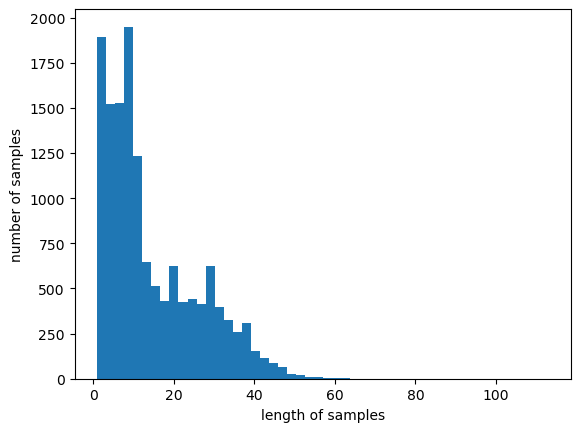

In [68]:
print('샘플의 최대 길이 : {}'.format(max([len(w) for w in inputs])))
print('샘플의 평균 길이 : {:4f}'.format(np.mean([len(w) for w in inputs])))
plt.hist([len(s) for s in inputs], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

**sample 들의 길이가 대체적으로 0-40의 길이를 가지며, 특히 0-20의 길이를 가진 샘플이 상당한 비율을 차지**

**keras 는 fixed size sequence 만 handling 가능하므로 max sequence length 를 60 으로 정함**

In [69]:
MAX_LENGTH = 60

##### 전체 word 수 check

In [70]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(inputs)

print(len(tokenizer.word_index))

21009


전체 token 갯수가 21009 개 이므로 상위 4000 개로 제한하여 vocabulary 재작성하고,  문장 데이터에 대해서는 entity_tokenizer를, 레이블에 해당되는 개체명 태깅 정보에 대해서는 tag_tokenizer를 작성

In [71]:
MAX_WORDS = 4000

### train, test split

In [72]:
train_sentences, test_sentences, train_tags, test_tags \
                = train_test_split(inputs, labels, test_size=0.2)
len(train_sentences), len(test_sentences), len(train_tags), len(test_tags)

(11232, 2809, 11232, 2809)

### word vocabulary 작성

- train data 는 validation set 을 볼 수 없으므로, entity tokenizer는 train_sentences 에 대해서만 tokenize 하고, tag tokenizer 는 전체 labels 에 대해 tokenize 한다.

In [73]:
entity_tokenizer = Tokenizer(num_words = MAX_WORDS, oov_token = '<OOV>')
entity_tokenizer.fit_on_texts(train_sentences)

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(labels)

vocab_size = entity_tokenizer.num_words + 1      # MAX_WORDS
tag_size = len(tag_tokenizer.word_index) + 1       #전체 word_index 갯수

print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 4001
개체명 태깅 정보 집합의 크기 : 10


In [95]:
print(entity_tokenizer.word_index)

{'<OOV>': 1, 'the': 2, '.': 3, ',': 4, 'of': 5, 'in': 6, 'to': 7, 'a': 8, 'and': 9, ')': 10, '(': 11, '"': 12, 'on': 13, 'said': 14, "'s": 15, 'for': 16, '1': 17, '-': 18, 'at': 19, 'was': 20, '2': 21, '0': 22, '3': 23, 'with': 24, 'that': 25, 'he': 26, 'it': 27, 'from': 28, 'by': 29, 'is': 30, ':': 31, 'as': 32, '4': 33, 'his': 34, 'had': 35, 'has': 36, 'an': 37, 'but': 38, 'not': 39, 'were': 40, 'after': 41, 'be': 42, 'have': 43, 'new': 44, 'first': 45, 'who': 46, 'will': 47, '5': 48, 'they': 49, 'two': 50, 'been': 51, 'u.s.': 52, '--': 53, '$': 54, 'beat': 55, '6': 56, 'would': 57, 'are': 58, 'their': 59, 'which': 60, 'up': 61, 'this': 62, 'its': 63, 'percent': 64, 'year': 65, 'i': 66, 'last': 67, 'we': 68, 'one': 69, 'out': 70, 'million': 71, 'thursday': 72, 'over': 73, 'government': 74, 'police': 75, '7': 76, 'results': 77, 'wednesday': 78, 'against': 79, 'when': 80, 'second': 81, '/': 82, 'tuesday': 83, 'soccer': 84, 'president': 85, 'three': 86, 'also': 87, 'division': 88, '10':

In [94]:
print(entity_tokenizer.index_word)

{1: '<OOV>', 2: 'the', 3: '.', 4: ',', 5: 'of', 6: 'in', 7: 'to', 8: 'a', 9: 'and', 10: ')', 11: '(', 12: '"', 13: 'on', 14: 'said', 15: "'s", 16: 'for', 17: '1', 18: '-', 19: 'at', 20: 'was', 21: '2', 22: '0', 23: '3', 24: 'with', 25: 'that', 26: 'he', 27: 'it', 28: 'from', 29: 'by', 30: 'is', 31: ':', 32: 'as', 33: '4', 34: 'his', 35: 'had', 36: 'has', 37: 'an', 38: 'but', 39: 'not', 40: 'were', 41: 'after', 42: 'be', 43: 'have', 44: 'new', 45: 'first', 46: 'who', 47: 'will', 48: '5', 49: 'they', 50: 'two', 51: 'been', 52: 'u.s.', 53: '--', 54: '$', 55: 'beat', 56: '6', 57: 'would', 58: 'are', 59: 'their', 60: 'which', 61: 'up', 62: 'this', 63: 'its', 64: 'percent', 65: 'year', 66: 'i', 67: 'last', 68: 'we', 69: 'one', 70: 'out', 71: 'million', 72: 'thursday', 73: 'over', 74: 'government', 75: 'police', 76: '7', 77: 'results', 78: 'wednesday', 79: 'against', 80: 'when', 81: 'second', 82: '/', 83: 'tuesday', 84: 'soccer', 85: 'president', 86: 'three', 87: 'also', 88: 'division', 89: '

In [74]:
print(tag_tokenizer.word_index)

{'o': 1, 'b-loc': 2, 'b-per': 3, 'b-org': 4, 'i-per': 5, 'i-org': 6, 'b-misc': 7, 'i-loc': 8, 'i-misc': 9}


### pad sequences  

- sentence 와 tag 를 sequence 로 변환  

In [75]:
X_train = entity_tokenizer.texts_to_sequences(train_sentences)
y_train = tag_tokenizer.texts_to_sequences(train_tags)

X_test = entity_tokenizer.texts_to_sequences(test_sentences)
y_test = tag_tokenizer.texts_to_sequences(test_tags)

len(X_train), len(y_train), len(X_test), len(y_test)

(11232, 11232, 2809, 2809)

In [97]:
print(X_train[0])
print(y_train[0])

[3263, 7, 2187, 2468, 9, 1, 6, 395, 9, 223, 245, 4, 9, 2809, 2468, 7, 2, 308, 109, 186, 83, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [77]:
X_train_padded = pad_sequences(X_train, maxlen = MAX_LENGTH, padding = 'post')
X_test_padded = pad_sequences(X_test, maxlen = MAX_LENGTH, padding = 'post')
y_train_padded = pad_sequences(y_train, maxlen = MAX_LENGTH, padding = 'post')
y_test_padded  = pad_sequences(y_test, maxlen = MAX_LENGTH, padding = 'post')
 
print(X_train_padded[0])
print(X_test_padded[0])
print(y_train_padded[0])
print(y_test_padded[0])

[3263    7 2187 2468    9    1    6  395    9  223  245    4    9 2809
 2468    7    2  308  109  186   83    3    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[ 890 1854   17   17   22   22   33   17   23    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4 6 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [78]:
y_train_onehot = to_categorical(y_train_padded, tag_size)
y_test_onehot = to_categorical(y_test_padded, tag_size)

### many-to-many model 이므로 return_sequences=True 로 설정

In [79]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dense(tag_size, activation = 'softmax'))
 
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         512128    
                                                                 
 bidirectional (Bidirection  (None, None, 512)         788480    
 al)                                                             
                                                                 
 dense (Dense)               (None, None, 10)          5130      
                                                                 
Total params: 1305738 (4.98 MB)
Trainable params: 1305738 (4.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.fit(X_train_padded, y_train_onehot , batch_size = 128, epochs = 10, 
              validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
88/88 [==============================] - 107s 1s/step - loss: 0.3753 - accuracy: 0.9162 - val_loss: 0.1950 - val_accuracy: 0.9588
Epoch 2/10
88/88 [==============================] - 109s 1s/step - loss: 0.1729 - accuracy: 0.9592 - val_loss: 0.1381 - val_accuracy: 0.9611
Epoch 3/10
88/88 [==============================] - 112s 1s/step - loss: 0.1121 - accuracy: 0.9664 - val_loss: 0.0986 - val_accuracy: 0.9701
Epoch 4/10
88/88 [==============================] - 106s 1s/step - loss: 0.0840 - accuracy: 0.9743 - val_loss: 0.0803 - val_accuracy: 0.9756
Epoch 5/10
88/88 [==============================] - 99s 1s/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0657 - val_accuracy: 0.9809
Epoch 6/10
88/88 [==============================] - 100s 1s/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.0562 - val_accuracy: 0.9843
Epoch 7/10
88/88 [==============================] - 102s 1s/step - loss: 0.0392 - accuracy: 0.9885 - val_loss: 0.0470 - val_accuracy: 0.9865
Epoch 8/10
88/

In [81]:
scores = model.evaluate(X_test_padded, y_test_onehot, verbose = 0)
print(f"{model.metrics_names[1]}: {scores[1] * 100}")   

accuracy: 98.78485798835754


### test inference

In [82]:
test_sample = ["EU gave German call to take British people"]

In [83]:
test_sample_tokenized = entity_tokenizer.texts_to_sequences(test_sample)
test_sample_padded = pad_sequences(test_sample_tokenized, maxlen = MAX_LENGTH, padding = 'post')
test_sample_padded

array([[886, 418, 207, 610,   7, 252, 203,  92,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0]])

In [84]:
index2word = entity_tokenizer.index_word
index2tag = tag_tokenizer.index_word

In [85]:
y_predicted = model.predict(test_sample_padded)
y_pred = y_predicted.argmax(axis = -1)
y_pred

1/1 [==============================] - 1s 1s/step


array([[4, 1, 7, 1, 1, 1, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [86]:
test_sample_tokenized

[[886, 418, 207, 610, 7, 252, 203, 92]]

In [87]:
for i in range(len(test_sample_tokenized)):
    for word, tag in zip([index2word.get(x, '?') for x in test_sample_tokenized[i]], 
                                  [index2tag.get(y, '?') for y in y_pred[i]]):
        if word != '<OOV>' and word != '?' and tag !='?':
            print(f'{word} :  {tag.upper()}')

eu :  B-ORG
gave :  O
german :  B-MISC
call :  O
to :  O
take :  O
british :  B-MISC
people :  O
